## Inference: DREAM MCMC

This example shows you how to perform Bayesian inference on a time series, using [DREAM MCMC](http://pints.readthedocs.io/en/latest/mcmc/dream_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

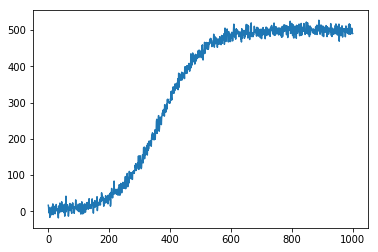

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints3/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Show the noisy data
plt.figure()
plt.plot(times, values)
plt.show()

In [8]:
# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise * 0.1],
    [0.02, 600, noise * 100]
    )

# Create a posterior log-likelihood
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Create a differential evolution MCMC routine
x0 = [
    real_parameters * 0.8,
    real_parameters * 0.9,
    real_parameters * 1.1,
]
mcmc = pints.MCMCSampling(log_posterior, 3, x0, method=pints.DreamMCMC)
mcmc.set_initial_phase_iterations(500)
mcmc.set_max_iterations(1000)
mcmc.set_log_to_screen(False)

Run!

In [9]:
# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...


C:\Users\bclamber\Desktop\AllPints\pints3\pints\pints\_mcmc\_dream.py:284: RuntimeWarning: invalid value encountered in double_scalars
  delta[j][d] / self._variance[j][d])
C:\Users\bclamber\Desktop\AllPints\pints3\pints\pints\_mcmc\_dream.py:284: RuntimeWarning: divide by zero encountered in double_scalars
  delta[j][d] / self._variance[j][d])


Done!


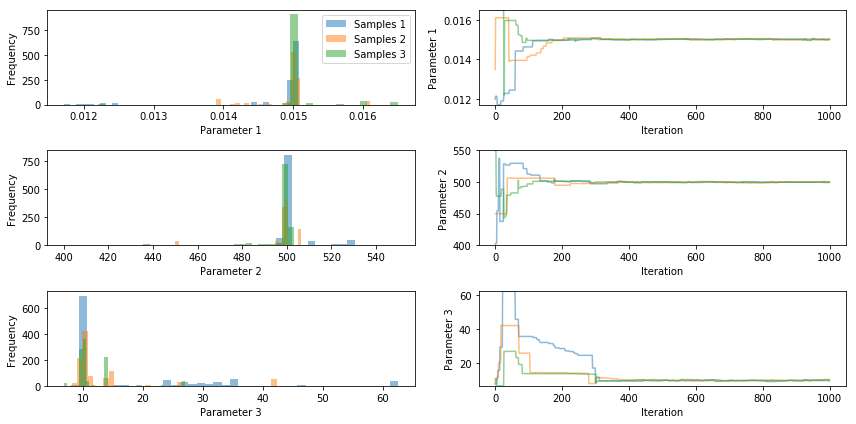

In [10]:
pints.plot.trace(chains)
plt.show()

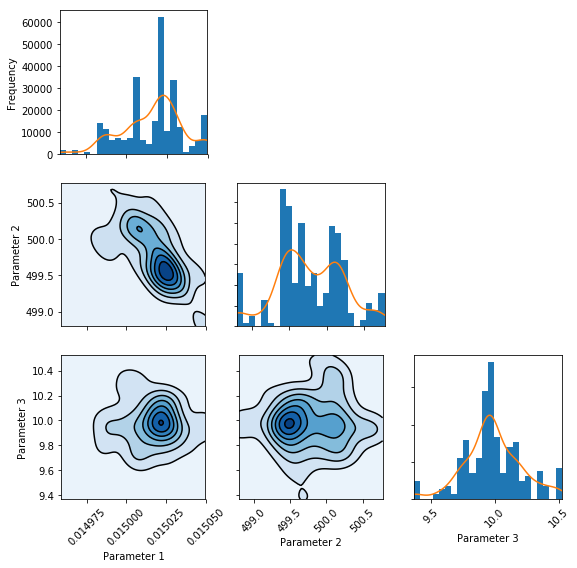

In [11]:
# Plot output
stacked = np.vstack(chains[:, 500::5])
pints.plot.pairwise(stacked, kde=True)
plt.show()

In [12]:
print(pints.rhat_all_params(chains[:, 1000:]))

C:\Users\bclamber\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\bclamber\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\bclamber\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\bclamber\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\bclamber\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero